In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report, roc_curve
from sklearn.feature_selection import f_classif

In [10]:
columns = np.array([
    "id", "diagnosis",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean",
    "smoothness_mean", "compactness_mean", "concavity_mean",
    "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",

    "radius_se", "texture_se", "perimeter_se", "area_se",
    "smoothness_se", "compactness_se", "concavity_se",
    "concave_points_se", "symmetry_se", "fractal_dimension_se",

    "radius_worst", "texture_worst", "perimeter_worst", "area_worst",
    "smoothness_worst", "compactness_worst", "concavity_worst",
    "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
])

In [2]:
df = pd.read_csv("wdbc_clean.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Feature selection
# f score for every feature, desecidng order sort then take top 10 features

x = df.drop("diagnosis", axis=1)
y = df["diagnosis"]
x_train,  x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, stratify=y, random_state=42)

In [11]:
f_scores, p_values = f_classif(x_train, y_train)
ordering_idx = np.argsort(-f_scores)
ordered_features = columns[ordering_idx]

print("Ordered features:", ordered_features)
print("F-scores:", f_scores)

Ordered features: ['texture_worst' 'fractal_dimension_se' 'concavity_worst' 'concavity_mean'
 'texture_mean' 'perimeter_worst' 'diagnosis' 'perimeter_mean'
 'compactness_mean' 'compactness_worst' 'fractal_dimension_mean'
 'perimeter_se' 'smoothness_mean' 'texture_se' 'smoothness_worst'
 'area_worst' 'radius_worst' 'concave_points_worst' 'radius_mean'
 'concavity_se' 'area_mean' 'concave_points_mean' 'symmetry_worst'
 'smoothness_se' 'compactness_se' 'symmetry_mean' 'area_se' 'radius_se'
 'concave_points_se' 'symmetry_se' 'id']
F-scores: [1.61212953e-03 3.18590353e+02 4.03070461e+01 3.41429609e+02
 2.86855559e+02 3.86619329e+01 1.18380614e+02 1.88074434e+02
 3.98029057e+02 2.41197113e+01 1.31847857e+00 1.26881236e+02
 3.86178540e-01 1.16815616e+02 1.19050165e+02 4.43718010e-01
 1.35630567e+01 7.45788996e+00 3.89986845e+01 1.61278632e-01
 8.68412594e-02 4.30483787e+02 5.56536050e+01 4.40947576e+02
 3.38946581e+02 5.67938344e+01 1.03063599e+02 1.47290483e+02
 4.01638411e+02 5.41420616e+01

In [12]:
# trying out the best possible combinations for c and gamma and then usinf stratified k fold to test them.

log2_c = range(-5, 16)
log2_gamma = range(-15, 4, 4)

param_grid = {
    "C": [2.0 ** p for p in log2_c],
    "gamma": [2.0 ** p for p in log2_gamma]
}

cv_inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
# grid search cv:

# SVC(gamma=0.1, C=0.1, kernel="linear")
grid = GridSearchCV(
    estimator=SVC(kernel="rbf"), #or kernel="poly", degree=4
    param_grid=param_grid,
    scoring="accuracy",
    cv=cv_inner,
    n_jobs=-1
)

grid.fit(x_train, y_train)
best_model = grid.best_estimator_
print("Best params:", grid.best_params_)

Best params: {'C': 0.03125, 'gamma': 3.0517578125e-05}


In [ ]:
y_pred = best_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

Accuracy: 0.6280701754385964
Confusion Matrix:
 [[179   0]
 [106   0]]
Classification Report:
               precision    recall  f1-score   support

           B       0.63      1.00      0.77       179
           M       0.00      0.00      0.00       106

    accuracy                           0.63       285
   macro avg       0.31      0.50      0.39       285
weighted avg       0.39      0.63      0.48       285



C:\Users\Laibaa\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Laibaa\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Laibaa\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi

AUC: 0.8492937704226837


Text(0, 0.5, 'True Positive Rate')

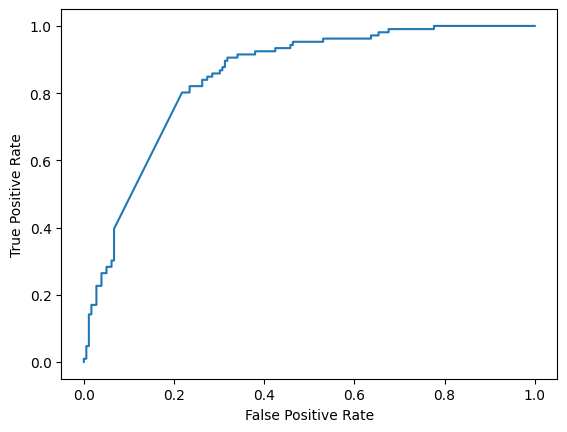

In [20]:
# implementing roc curve and auc
y_score = best_model.decision_function(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=best_model.classes_[1])

auc = roc_auc_score(y_test, y_score)
print("AUC:", auc)

plt.plot(fpr, tpr, label=f"AUC= {auc: .2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

3️⃣ Adjusting Hyperparameters C and gamma

C → Regularization parameter.

Low C → more regularization (allows some misclassification for simplicity)

High C → less regularization (tries to classify every point correctly)

gamma → Kernel coefficient (for rbf, poly, sigmoid)

Low gamma → points far away have influence (smooth decision boundary)

High gamma → only points near the boundary matter (complex boundary)